In [110]:
from matplotlib.pylab import plt
import numpy as np

In [111]:
def K_kernel(x):
    #x = np.linalg.norm(x)
    K = -1 / (np.exp(x/0.1) + 2 + np.exp(-x/0.1))
    return K

def K_kernel2(x):
    #x = np.linalg.norm(x)
    x = np.clip(x, -10, 10)
    K = -1 / (np.exp(x / 0.2) + np.exp(-x / 0.2))
    return K

In [112]:
c_v1 = 60*0.01
c_v2 = 1

x = np.linspace(0,1, 100)

In [113]:
y = -c_v1 * K_kernel(c_v2 * (x))

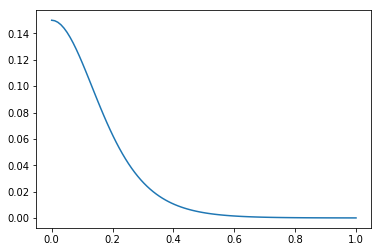

In [114]:
plt.plot(x,y)

#@#plt.ylim([0,2])

In [115]:
def K_kernel3(x):
    x = np.linalg.norm(x)
    K = -1 / (np.exp(x/0.1) + 2 + np.exp(-x/0.1))
    return K

def reward7(velocity_base, v_commdand):
    v_e = np.concatenate((velocity_base[:2], velocity_base[-1:])) - v_commdand  # x, y, yaw
    vxy = v_commdand[:2]
    wyaw = v_commdand[2]
    dt =0.01

    #reward calculate
    kc = 1
    c_w = 150* dt
    c_v1 = 200 *  dt
    c_v2 = 1
    lin_vel_cost = c_v1 * K_kernel3(c_v2 * (velocity_base[:2] - vxy))
    ang_vel_cost = c_w * K_kernel3(velocity_base[-1] -wyaw )

    return -lin_vel_cost, -ang_vel_cost

In [116]:
v_b = np.array([-0.0001462446,-0.0053383102,-0.0456031509,0.0720960647,0.0809975155,0.0101319291])
v_command = np.array([-0.3,0,0])

In [117]:
lin_reward , ang_reward = reward7(v_b, v_command)

print(lin_reward, ang_reward)

0.09043409547659663 0.37403924432956864


In [1]:
 
import gym
import numpy as np

from my_envs.mujoco import *
from my_envs.base.command_generator import command_generator
from matplotlib.pylab import plt
from evaluate.plot_results import *

In [2]:
env = gym.make('CellrobotEnvCPG-v0')  # Swimmer2-v2  SpaceInvaders-v0 CellrobotEnv-v0

#env = gym.wrappers.Monitor(env, 'tmp/tmp.mp4', force=True)

print('state: ', env.observation_space)
print('action: ', env.action_space)
q_dim = 1

command =  command_generator(10000, 0.01, 2, vx_range=(-0.2, 0.2), vy_range = (0,0), wyaw_range = (0,0))
reward_fun = 1
obs = env.reset(command = command, reward_fun_choice = reward_fun)
print('test')

max_step = 1000

# while True:
#     env.render()

v_e = []
c_command = []
xyz = []

rewards = []
action = np.ones(39)* ( 1)
for i in range(max_step):

   # env.render()
    #action = env.action_space.sample()

    next_obs, reward, done, infos = env.step(action)



    obs = next_obs

    v_e.append(infos['velocity_base'])
    c_command.append(infos['commands'])
    xyz.append(infos['obs'][:3])
    rewards.append(infos['rewards'])

    #env.render(mode='rgb_array')#mode='rgb_array'
env.close()
dt =0.01


v_e = np.array(v_e)
c_command = np.array(c_command)
xyz = np.array(xyz)



ACTION_DIM is not sepecified, so action dim is default.
Policy action size :  None
state:  Box(113,)
action:  Box(13,)
REWARD_CHOICE is not specified!
test


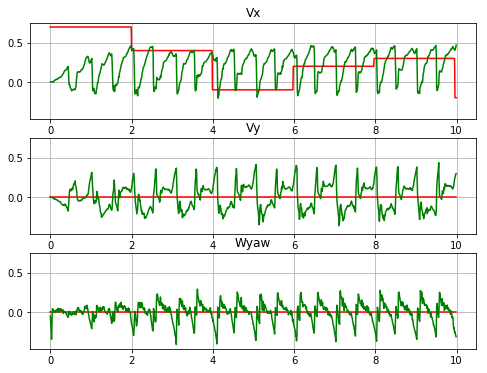

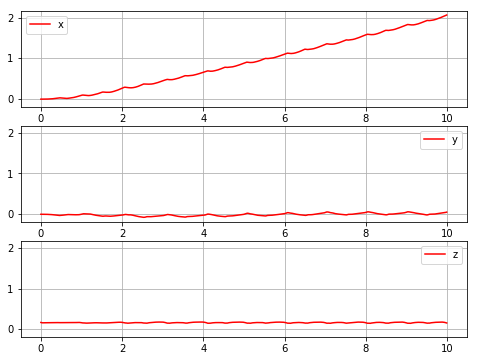

No handles with labels found to put in legend.


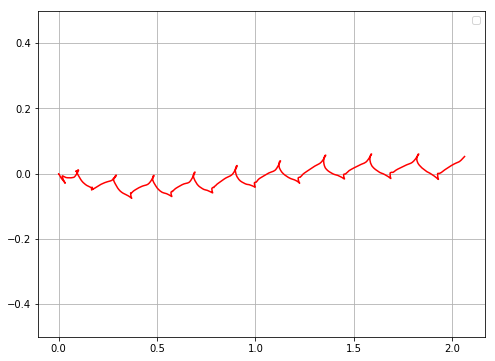

In [3]:
plot_velocity_curve(v_e, c_command, max_step, dt = 0.01, figsize=(8,6))
plot_position_time(xyz, max_step, dt = 0.01, figsize=(8,6))
plot_traj_xy(xyz, max_step, dt = 0.01, figsize=(8,6))

In [4]:
rewards

[array([ 0.41109833,  0.22172849, -0.00060887, -0.01002129,  0.2       ]),
 array([ 0.41111488,  0.22174853, -0.00059499, -0.01003866,  0.2       ]),
 array([ 0.4124    ,  0.22176072, -0.00059897, -0.00876175,  0.2       ]),
 array([ 0.41104192,  0.22177262, -0.00068364, -0.01004706,  0.2       ]),
 array([ 0.39943438,  0.22191377, -0.00092233, -0.02155706,  0.2       ]),
 array([ 0.40046525,  0.22199195, -0.0013903 , -0.0201364 ,  0.2       ]),
 array([ 0.40164708,  0.22169268, -0.00215268, -0.01789293,  0.2       ]),
 array([ 0.40201683,  0.22152458, -0.00325645, -0.01625131,  0.2       ]),
 array([ 0.4009136 ,  0.22147592, -0.00472648, -0.01583584,  0.2       ]),
 array([ 0.39714051,  0.22240016, -0.00655969, -0.01869996,  0.2       ]),
 array([ 0.39806491,  0.22281771, -0.00872638, -0.01602642,  0.2       ]),
 array([ 0.3959944 ,  0.22320348, -0.0111686 , -0.01604048,  0.2       ]),
 array([ 0.39332966,  0.22318184, -0.0138    , -0.01605218,  0.2       ]),
 array([ 0.39087606,  0.2

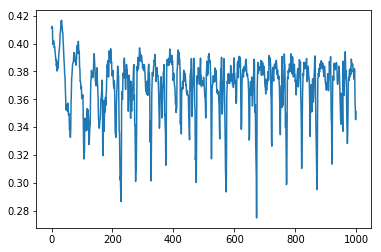

In [5]:
rewards = np.array(rewards)
#forward_reward, ctrl_cost, contact_cost, survive_reward

plt.plot(rewards[:,0])


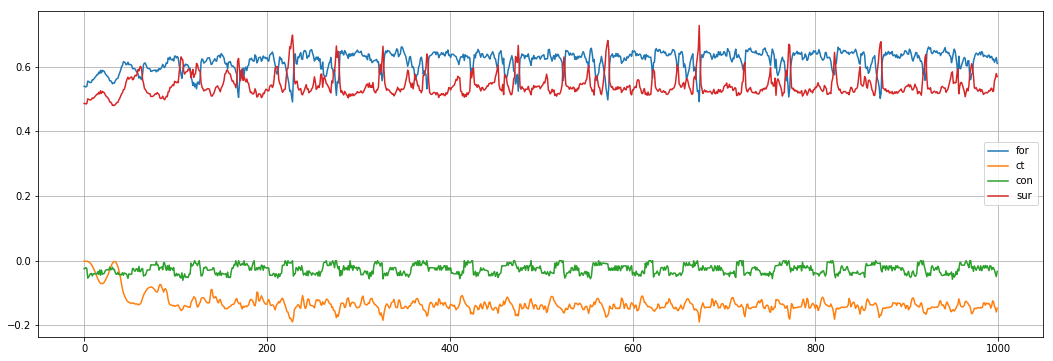

In [16]:
forward_reward = np.abs(rewards[:,1]/rewards[:,0]) * np.sign(rewards[:,1])
ctrl_cost = np.abs(rewards[:,2]/rewards[:,0]) * np.sign(rewards[:,2])
contact_cost = np.abs(rewards[:,3]/rewards[:,0]) * np.sign(rewards[:,3])
survive_reward = np.abs(rewards[:,4]/rewards[:,0]) * np.sign(rewards[:,4])


plt.figure(figsize=(18,6))
plt.plot(forward_reward, label='for')
plt.plot(ctrl_cost, label='ct')
plt.plot(contact_cost, label='con')
plt.plot(survive_reward, label='sur')
plt.grid()
plt.legend()

#plt.bar(range(forward_reward.shape[0]), forward_reward)

In [1]:
import os 
os.chdir('/home/drl/PycharmProjects/rl_baselines/baselines')
import gym
import numpy as np

from my_envs.mujoco import *
from my_envs.base.command_generator import command_generator
from matplotlib.pylab import plt
from evaluate.plot_results import *

def plot_fitness_t(reward_fun):
    env = gym.make('CellrobotEnvCPG-v0')  # Swimmer2-v2  SpaceInvaders-v0 CellrobotEnv-v0
 
    print('state: ', env.observation_space)
    print('action: ', env.action_space)
 

    command =  command_generator(10000, 0.01, 2, vx_range=(-0.2, 0.2), vy_range = (0,0), wyaw_range = (0,0))
    
    obs = env.reset( command, reward_fun)
 

    max_step = 1000
 

    v_e = []
    c_command = []
    xyz = []

    rewards = []
    action = np.ones(39)* ( 1)
    for i in range(max_step):

       # env.render()
        #action = env.action_space.sample()

        next_obs, reward, done, infos = env.step(action)
        obs = next_obs

        v_e.append(infos['velocity_base'])
        c_command.append(infos['commands'])
        xyz.append(infos['obs'][:3])
        rewards.append(infos['rewards'])

        #env.render(mode='rgb_array')#mode='rgb_array'
    env.close()
    dt =0.01


    v_e = np.array(v_e)
    c_command = np.array(c_command)
    xyz = np.array(xyz)
    
    
    plt.figure(figsize=(18,6))
    rewards_duty = []   
    for i in range(rewards.shape[1]-1):
        rewards_duty.append(np.abs(rewards[:,1+i]/rewards[:,0]) * np.sign(rewards[:,1+i]))
         


        
        plt.plot(rewards_duty[i], label=str(i))
    
    plt.grid()
    plt.legend()
    plt.show()
     


In [2]:
plot_fitness_t(1)

ACTION_DIM is not sepecified, so action dim is default.
Policy action size :  None
state:  Box(113,)
action:  Box(13,)


TypeError: reset() takes 1 positional argument but 3 were given

In [8]:
env = gym.make('CellrobotEnvCPG-v0')  # Swimmer2-v2  SpaceInvaders-v0 CellrobotEnv-v0
 
print('state: ', env.observation_space)
print('action: ', env.action_space)


command =  command_generator(10000, 0.01, 2, vx_range=(-0.2, 0.2), vy_range = (0,0), wyaw_range = (0,0))
reward_fun =1
obs = env.reset( command, reward_fun)


max_step = 1000


v_e = []
c_command = []
xyz = []

rewards = []
action = np.ones(39)* ( 1)
for i in range(max_step):

   # env.render()
    #action = env.action_space.sample()

    next_obs, reward, done, infos = env.step(action)
    obs = next_obs

    v_e.append(infos['velocity_base'])
    c_command.append(infos['commands'])
    xyz.append(infos['obs'][:3])
    rewards.append(infos['rewards'])

    #env.render(mode='rgb_array')#mode='rgb_array'
env.close()
dt =0.01


v_e = np.array(v_e)
c_command = np.array(c_command)
xyz = np.array(xyz)


plt.figure(figsize=(18,6))
rewards_duty = []   
for i in range(rewards.shape[1]-1):
    rewards_duty.append(np.abs(rewards[:,1+i]/rewards[:,0]) * np.sign(rewards[:,1+i]))




    plt.plot(rewards_duty[i], label=str(i))

plt.grid()
plt.legend()
plt.show()

ACTION_DIM is not sepecified, so action dim is default.
Policy action size :  None
state:  Box(113,)
action:  Box(13,)


TypeError: reset() takes 1 positional argument but 3 were given